In [1]:
import pandas as pd
import numpy as np
from pandas import set_option
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#path = 'C:/Users/HOANG HIEP/Documents/risk python/cr_loan.csv'
cr_loan = pd.read_csv('C:/Users/HOANG HIEP/Documents/risk python/cr_loan.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
cr_loan.shape

(32581, 12)

In [4]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
cr_loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:ylabel='loan_status'>

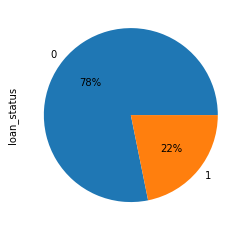

In [7]:
#xem phân bổ loan_status
cr_loan['loan_status'].value_counts().plot(kind='pie', autopct= '%1.0f%%')
# autopct= '%1.0f%%' để hiển thị %

In [8]:
#chia làm data số và category
data_num = cr_loan.select_dtypes(exclude=['object'])
data_str = cr_loan.select_dtypes(include=['object'])

In [9]:
data_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [10]:
#Những category nào xuất hiện nhiều nhất
data_str.mode()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,A,N


<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

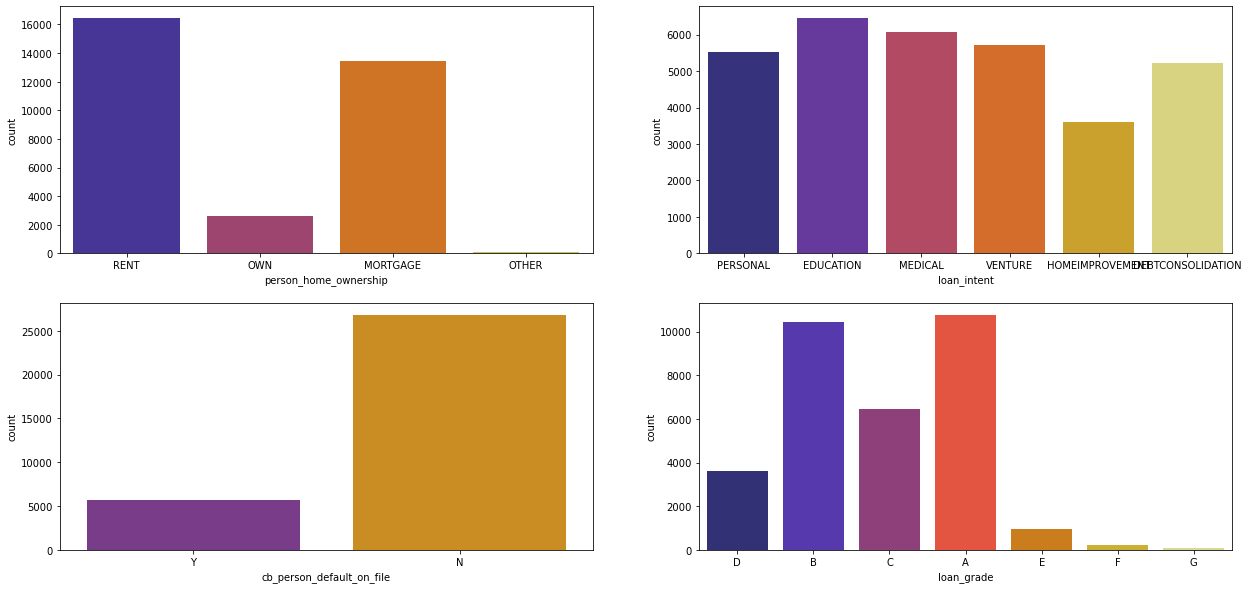

In [11]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership', data = cr_loan, ax=axes[0,0], palette='CMRmap')
sns.countplot('loan_intent', data = cr_loan, ax=axes[0,1], palette='CMRmap')
sns.countplot('loan_grade', data = cr_loan, ax=axes[1,1], palette='CMRmap')
sns.countplot('cb_person_default_on_file', data = cr_loan, ax=axes[1,0], palette='CMRmap')

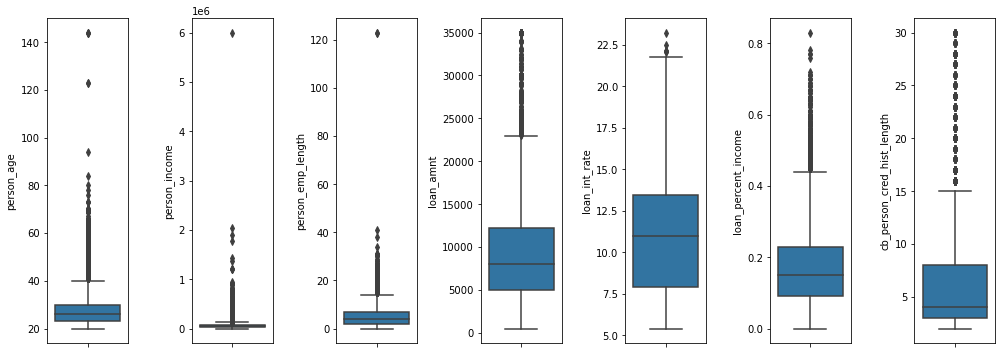

In [12]:
data_num_bl = data_num.drop(['loan_status'], axis=1)
fig, axs = plt.subplots(ncols=7, figsize=(14, 5))
index = 0
axs = axs.flatten()
for k,v in data_num_bl.items():
    sns.boxplot(y=k, data=data_num_bl, ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)

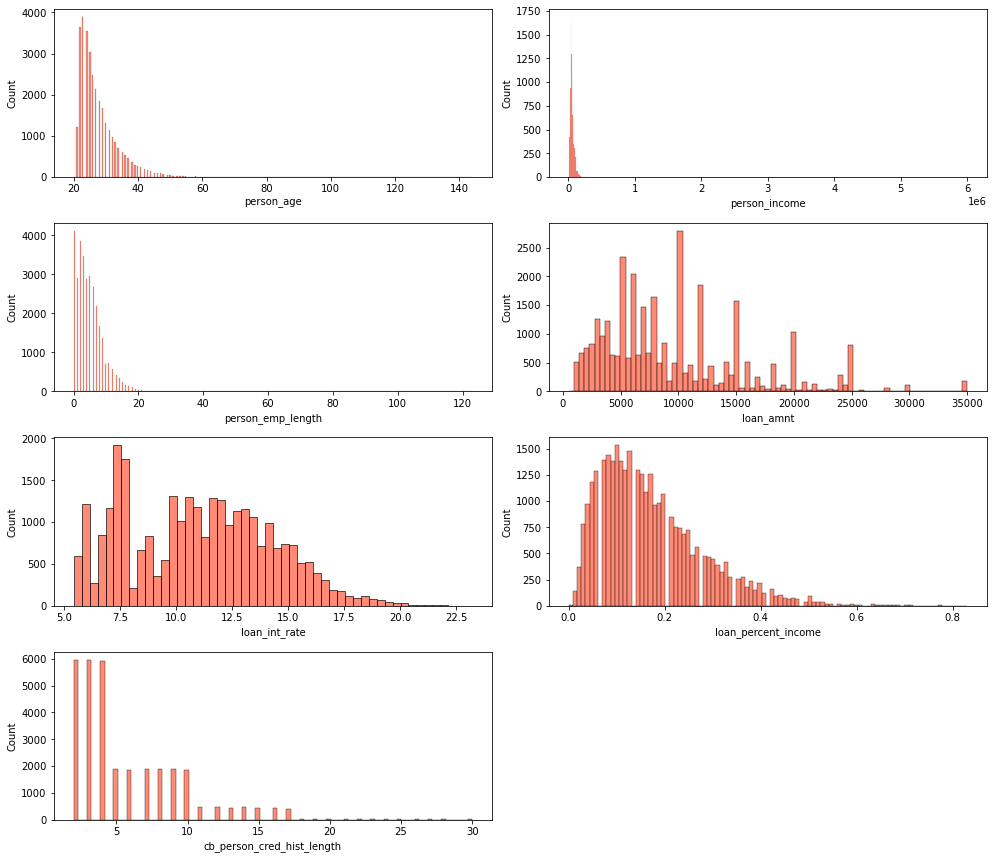

In [68]:
fig, axs = plt.subplots(4,2, figsize=(14, 12))
index = 0
axs = axs.flatten()
for k,v in data_num_bl.items():
    sns.histplot(x=k, data=data_num_bl, color = "tomato", ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
axs.flat[-1].set_visible(False) 

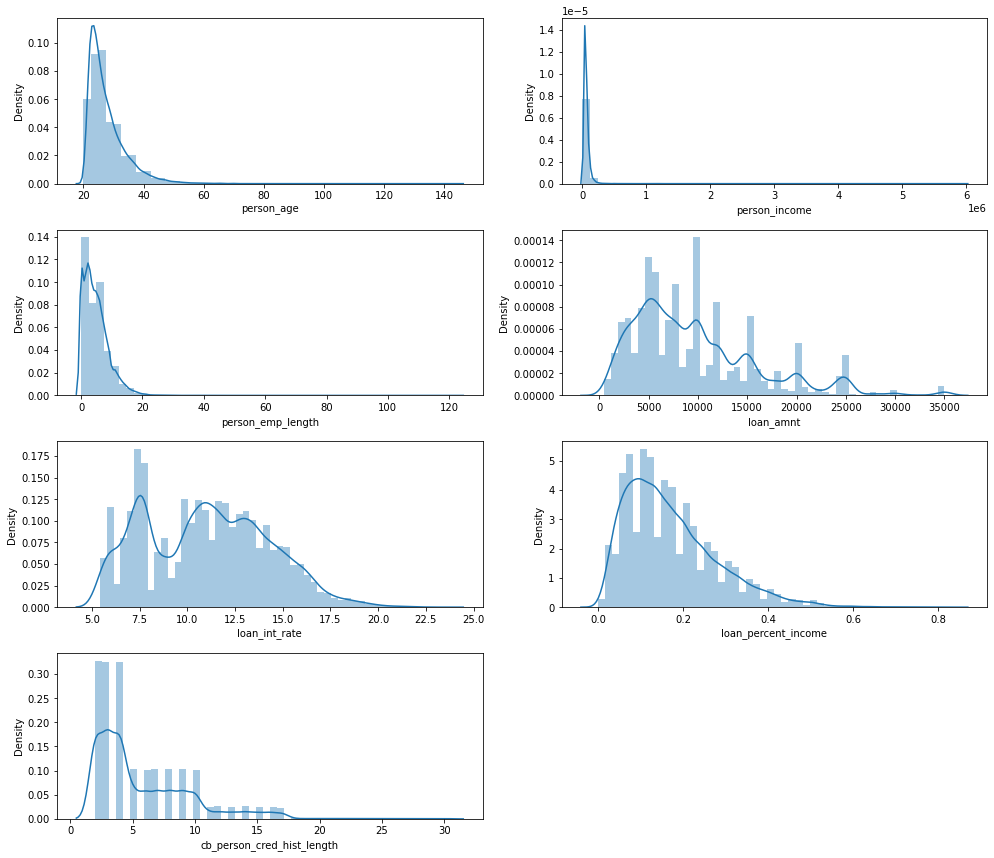

In [65]:
fig, axs = plt.subplots(4,2, figsize=(14, 12))
index = 0
axs = axs.flatten()
for k,v in data_num_bl.items():
    sns.distplot(data_num_bl[k], ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
axs.flat[-1].set_visible(False) 

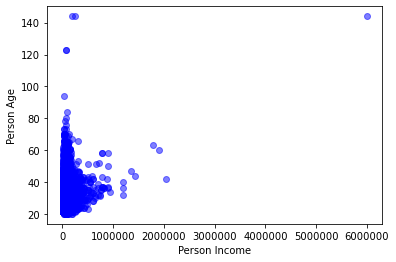

In [14]:
plt.ticklabel_format(style='plain',axis='x')
plt.scatter(data_num['person_income'], data_num['person_age'], c='blue', alpha = 0.5)
plt.xlabel("Person Income")
plt.ylabel("Person Age")
plt.show()

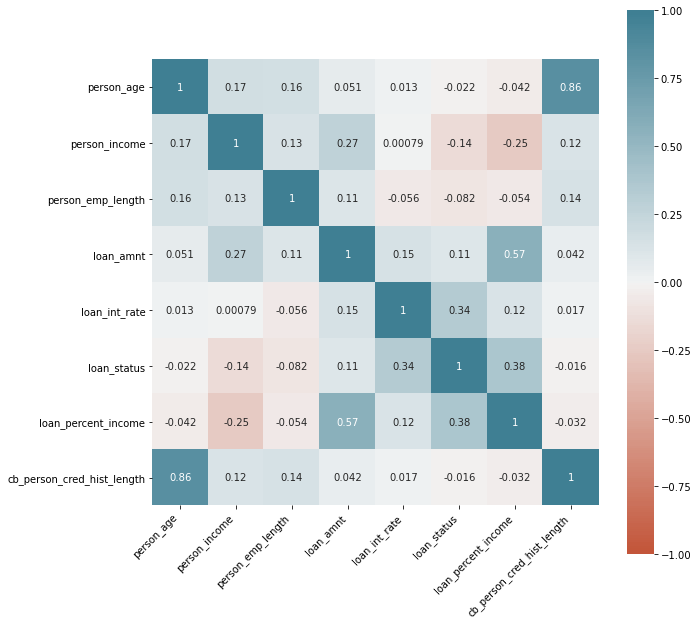

In [15]:
# correlation
set_option('precision', 2)
cor = data_num.corr(method='pearson')
# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
#nhận thấy có những giá trị person_emp_length (số năm đi làm) quá lớn, cần loại bỏ những giá trị lớn hơn 60
outlier1 = cr_loan[cr_loan['person_emp_length'] > 60].index
#loại bỏ những người tuổi lớn hơn 100
outlier2 = cr_loan[cr_loan['person_age'] > 100].index

cr_loan_new = cr_loan.drop(outlier1).drop(outlier2)

In [17]:
cr_loan_new.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
#Thay thế null value bằng median
cr_loan_new.fillna(value = cr_loan_new.mean(), inplace=True)

In [19]:
import scorecardpy as sc

In [20]:
dt_s = sc.var_filter(cr_loan_new, y="loan_status")

[INFO] filtering variables ...


In [21]:
dt_s.head()

,loan_percent_income,loan_amnt,person_income,person_age,person_emp_length,cb_person_default_on_file,loan_intent,person_home_ownership,loan_grade,loan_int_rate,loan_status
1,0.10,1000,9600,21,5.0,N,EDUCATION,OWN,B,11.14,0
2,0.57,5500,9600,25,1.0,N,MEDICAL,MORTGAGE,C,12.87,1
3,0.53,35000,65500,23,4.0,N,MEDICAL,RENT,C,15.23,1
4,0.55,35000,54400,24,8.0,Y,MEDICAL,RENT,C,14.27,1
5,0.25,2500,9900,21,2.0,N,VENTURE,OWN,A,7.14,1


In [22]:
#Tách data thành biến độc lập và biến target
X = dt_s.loc[:,dt_s.columns != 'loan_status']
y = dt_s.loc[:,dt_s.columns == 'loan_status']

In [23]:
train, test = sc.split_df(dt_s, 'loan_status').values()

print(train.shape)
print(test.shape)

(22802, 11)
(9772, 11)


In [24]:
breaks_adj = {'person_emp_length':[3.0,5.0],
             'loan_amnt':[3500.0, 18500.0]}
bins = sc.woebin(dt_s, y="loan_status", breaks_list=breaks_adj)
#'loan_intent':['EDUCATION','PERSONAL','HOMEIMPROMENT%,%MEDICAL','DEBTCONSOLIDATION%,%VENTURE']

[INFO] creating woe binning ...


In [25]:
bins['loan_intent']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_intent,VENTURE,5716,0.18,4869,847,0.15,-0.47,0.03,0.09,VENTURE,False
1,loan_intent,"EDUCATION%,%PERSONAL",11970,0.37,9762,2208,0.18,-0.21,0.02,0.09,"EDUCATION%,%PERSONAL",False
2,loan_intent,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",14888,0.46,10836,4052,0.27,0.29,0.04,0.09,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",False


{'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>,
 'person_income': <Figure size 432x288 with 2 Axes>,
 'person_age': <Figure size 432x288 with 2 Axes>,
 'person_emp_length': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'person_home_ownership': <Figure size 432x288 with 2 Axes>,
 'loan_grade': <Figure size 432x288 with 2 Axes>,
 'loan_int_rate': <Figure size 432x288 with 2 Axes>}

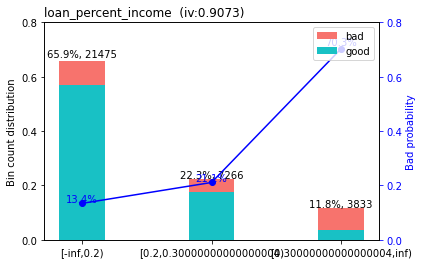

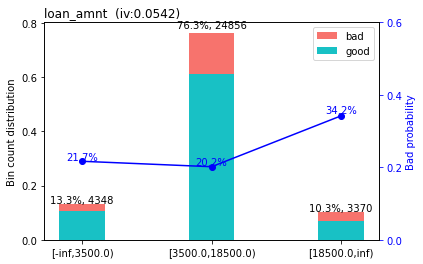

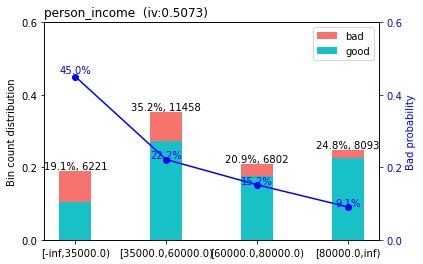

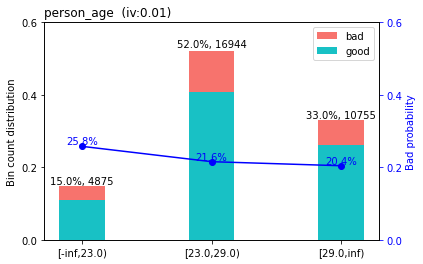

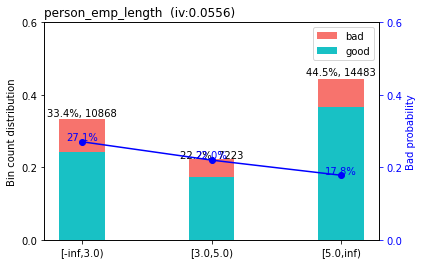

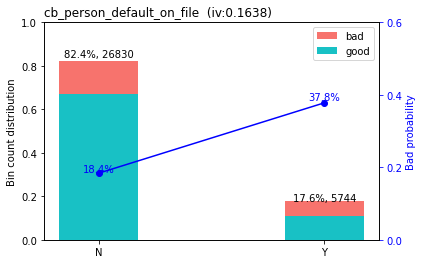

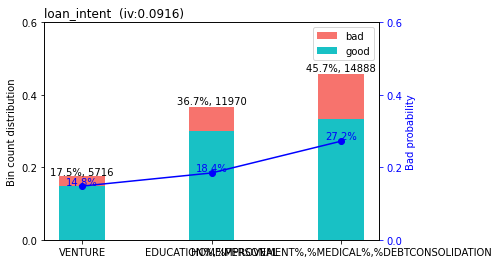

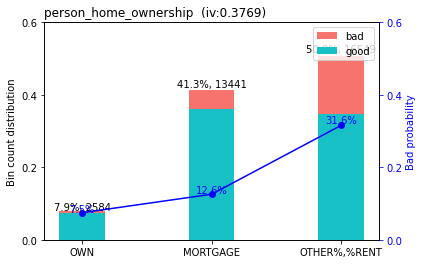

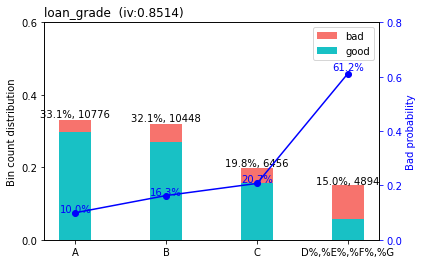

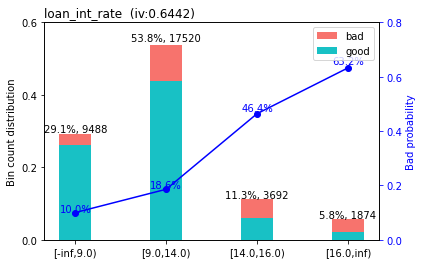

In [26]:
#Plot kết quả binning của từng biến
sc.woebin_plot(bins)

In [27]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [28]:
#tách Train/Test thành biến độc lập X và y
y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 1.06476406  0.39319604  0.80630489  0.07386015  0.38160349 -0.03951851
   1.47162675  0.98233483  1.18596544  0.12682029]]
[-1.38284093]


In [30]:
lrscore = lr.score(X_test, y_test)
print(str(int(lrscore*100)) + "%")

87%


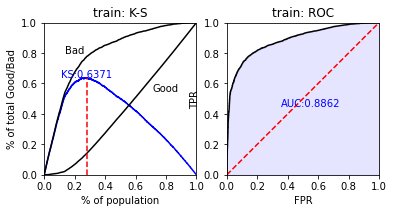

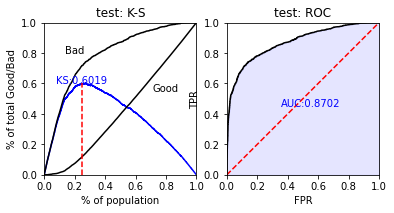

In [31]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]
#KS\ROC
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [32]:
#scorecard
card = sc.scorecard(bins, lr, X_train.columns)
#score
train_score = sc.scorecard_ply(train, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp=None)
test_score = sc.scorecard_ply(test, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp=None)
score = sc.scorecard_ply(cr_loan, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp=None)

In [33]:
#show scorecard
print('Scorecard:',end='\n')
card

Scorecard:


{'basepoints':      variable  bin  points
 0  basepoints  NaN     487,
 'loan_percent_income':               variable                        bin  points
 0  loan_percent_income                 [-inf,0.2)    45.0
 1  loan_percent_income  [0.2,0.30000000000000004)     3.0
 2  loan_percent_income  [0.30000000000000004,inf)  -164.0,
 'loan_amnt':     variable               bin  points
 3  loan_amnt     [-inf,3500.0)     0.0
 4  loan_amnt  [3500.0,18500.0)     3.0
 5  loan_amnt     [18500.0,inf)   -18.0,
 'person_income':         variable                bin  points
 6  person_income     [-inf,35000.0)   -63.0
 7  person_income  [35000.0,60000.0)    -1.0
 8  person_income  [60000.0,80000.0)    26.0
 9  person_income      [80000.0,inf)    60.0,
 'person_age':       variable          bin  points
 10  person_age  [-inf,23.0)    -1.0
 11  person_age  [23.0,29.0)     0.0
 12  person_age   [29.0,inf)     0.0,
 'person_emp_length':              variable         bin  points
 13  person_emp_length  [

In [34]:
#overall dataset score
score

,loan_percent_income_points,loan_amnt_points,person_income_points,person_age_points,person_emp_length_points,cb_person_default_on_file_points,loan_intent_points,person_home_ownership_points,loan_grade_points,loan_int_rate_points,score
0,-164.0,-18.0,-1.0,-1.0,7.0,2.0,22.0,-36.0,-148.0,-17.0,133.0
1,45.0,0.0,-63.0,-1.0,7.0,-1.0,22.0,88.0,31.0,2.0,617.0
2,-164.0,3.0,-63.0,0.0,-8.0,-1.0,-31.0,47.0,6.0,2.0,278.0
3,-164.0,-18.0,26.0,0.0,-0.0,-1.0,-31.0,-36.0,6.0,-10.0,259.0
4,-164.0,-18.0,-1.0,0.0,7.0,2.0,-31.0,-36.0,6.0,-10.0,242.0
...,...,...,...,...,...,...,...,...,...,...,...
32576,45.0,3.0,-1.0,0.0,-8.0,-1.0,22.0,47.0,6.0,2.0,602.0
32577,45.0,3.0,60.0,0.0,-0.0,-1.0,22.0,47.0,79.0,8.0,750.0
32578,-164.0,-18.0,26.0,0.0,-0.0,-1.0,-31.0,-36.0,31.0,2.0,296.0
32579,45.0,3.0,60.0,0.0,7.0,-1.0,22.0,47.0,31.0,2.0,703.0


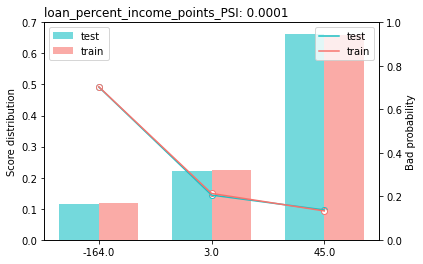

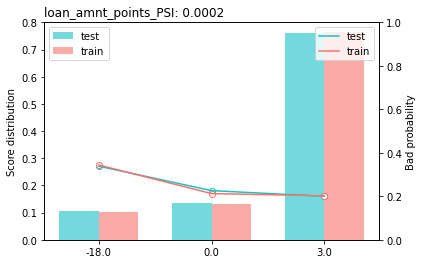

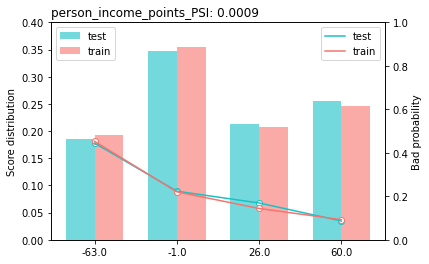

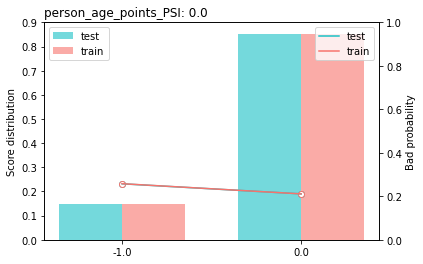

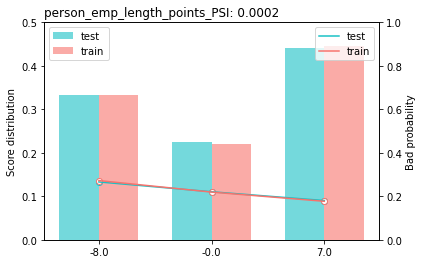

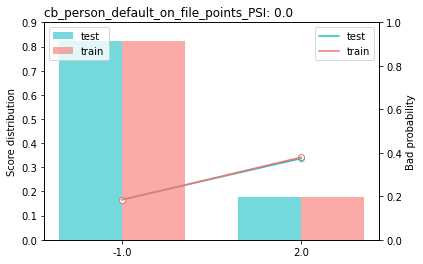

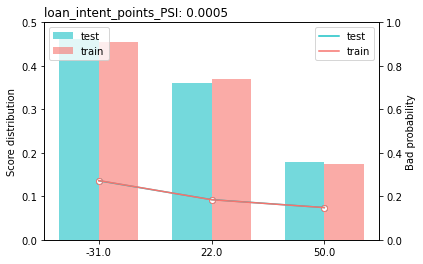

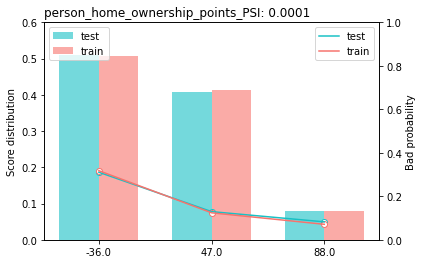

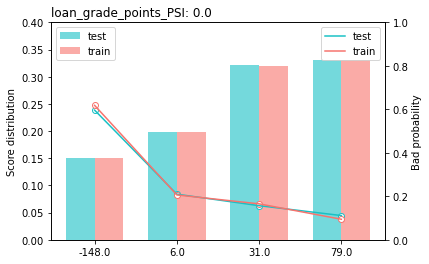

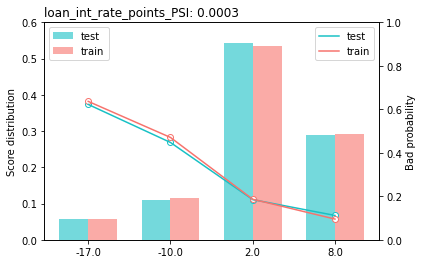

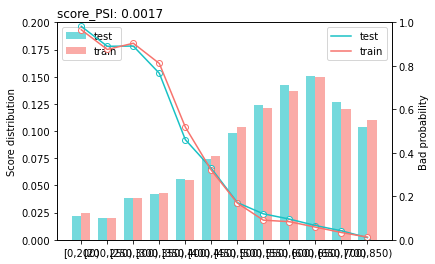

{'psi':                             variable       PSI
 0         loan_percent_income_points  5.33e-05
 1                   loan_amnt_points  1.84e-04
 2               person_income_points  8.79e-04
 3                  person_age_points  3.93e-07
 4           person_emp_length_points  1.91e-04
 5   cb_person_default_on_file_points  6.87e-06
 6                 loan_intent_points  4.55e-04
 7       person_home_ownership_points  1.24e-04
 8                  loan_grade_points  1.19e-05
 9               loan_int_rate_points  2.99e-04
 10                             score  1.70e-03,
 'pic': {'loan_percent_income_points': <Figure size 432x288 with 2 Axes>,
  'loan_amnt_points': <Figure size 432x288 with 2 Axes>,
  'person_income_points': <Figure size 432x288 with 2 Axes>,
  'person_age_points': <Figure size 432x288 with 2 Axes>,
  'person_emp_length_points': <Figure size 432x288 with 2 Axes>,
  'cb_person_default_on_file_points': <Figure size 432x288 with 2 Axes>,
  'loan_intent_points': <Fig

In [35]:
sc.perf_psi(
score = {'train':train_score, 'test':test_score},
label = {'train':y_train, 'test':y_test})